
    # Customer Churn Prediction (Medical Insurance Dataset)
    
    **Goal:** Predict which customers are at risk of churn (high medical costs) based on demographic and health features.  
    
    - **Dataset:** Includes age, BMI, number of children, smoking status, and region.  
    - **Target Variable:** `churn_risk` (1 if medical charges are above median, else 0).  
    - **Models Used:** Logistic Regression, Random Forest, XGBoost.  
    
   
    

In [ ]:

    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

    # Ignore warnings
    import warnings
    warnings.filterwarnings("ignore")


In [ ]:

    # Load dataset
    df = pd.read_csv("insurance.csv")

    # Display dataset info
    print("Dataset Info:")
    display(df.info())

    # Show first few rows
    print("First 5 rows:")
    display(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(df.shape)


(1338, 7)


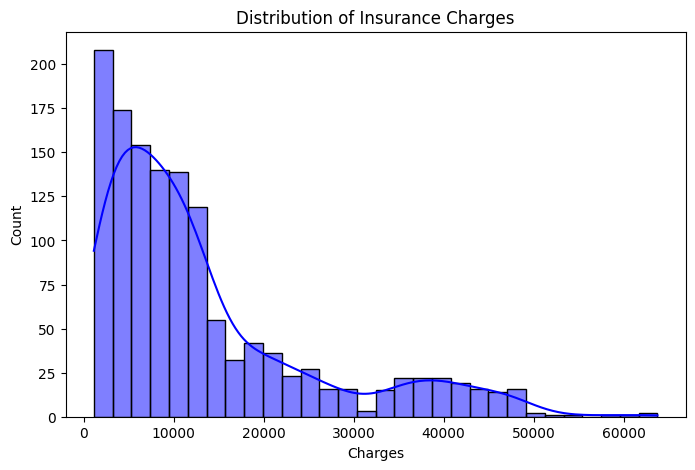

In [ ]:
# Distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

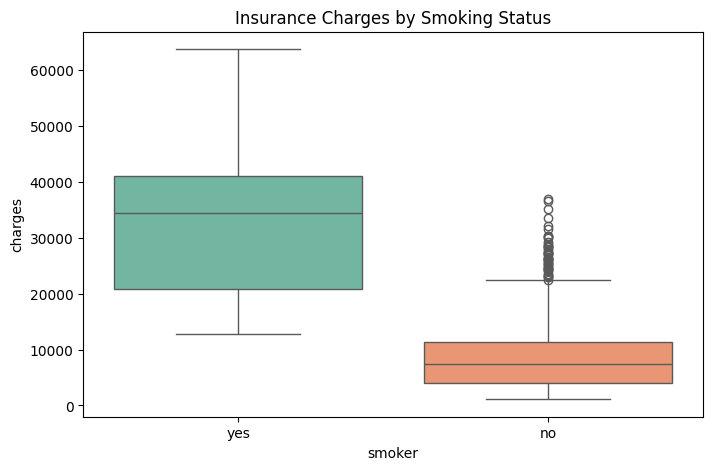

In [ ]:
# Charges by smoking status
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Smoking Status')
plt.show()

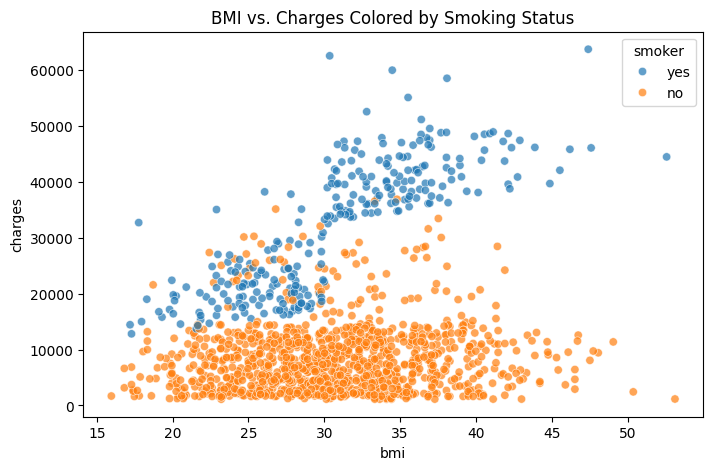

In [ ]:
# BMI vs. Charges with Smoking Status
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('BMI vs. Charges Colored by Smoking Status')
plt.show()

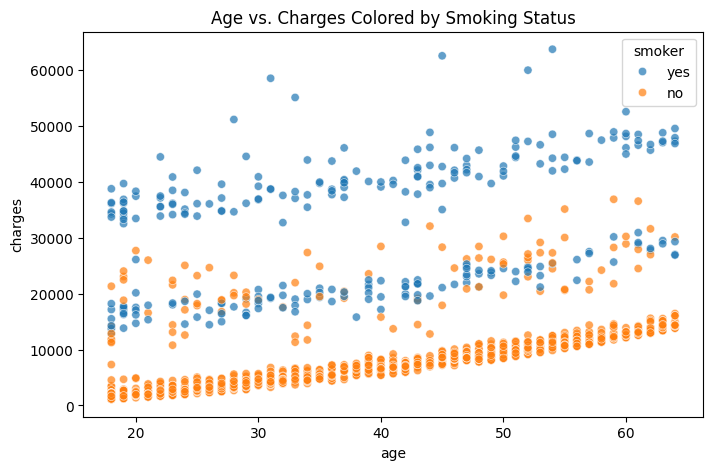

In [ ]:
# Age vs. Charges with Smoking Status
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('Age vs. Charges Colored by Smoking Status')
plt.show()

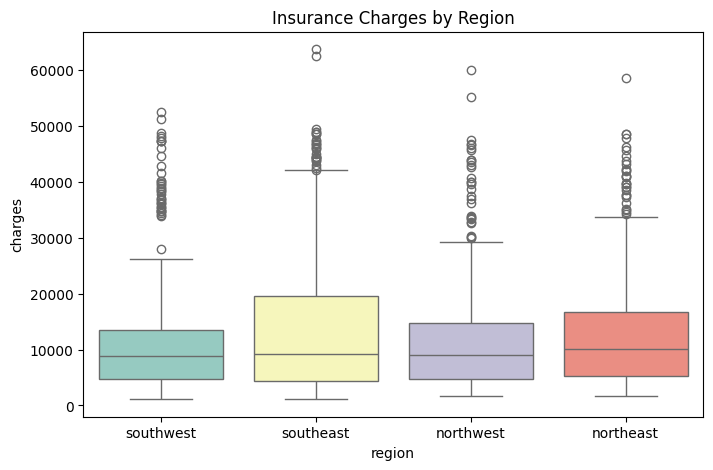

In [ ]:
# Charges by Region
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Insurance Charges by Region')
plt.show()


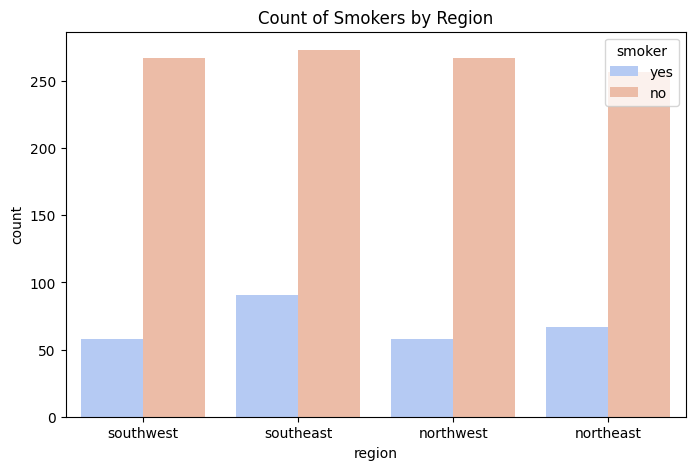

In [ ]:
# Count of Smokers by Region
plt.figure(figsize=(8,5))
sns.countplot(x='region', hue='smoker', data=df, palette='coolwarm')
plt.title('Count of Smokers by Region')
plt.show()

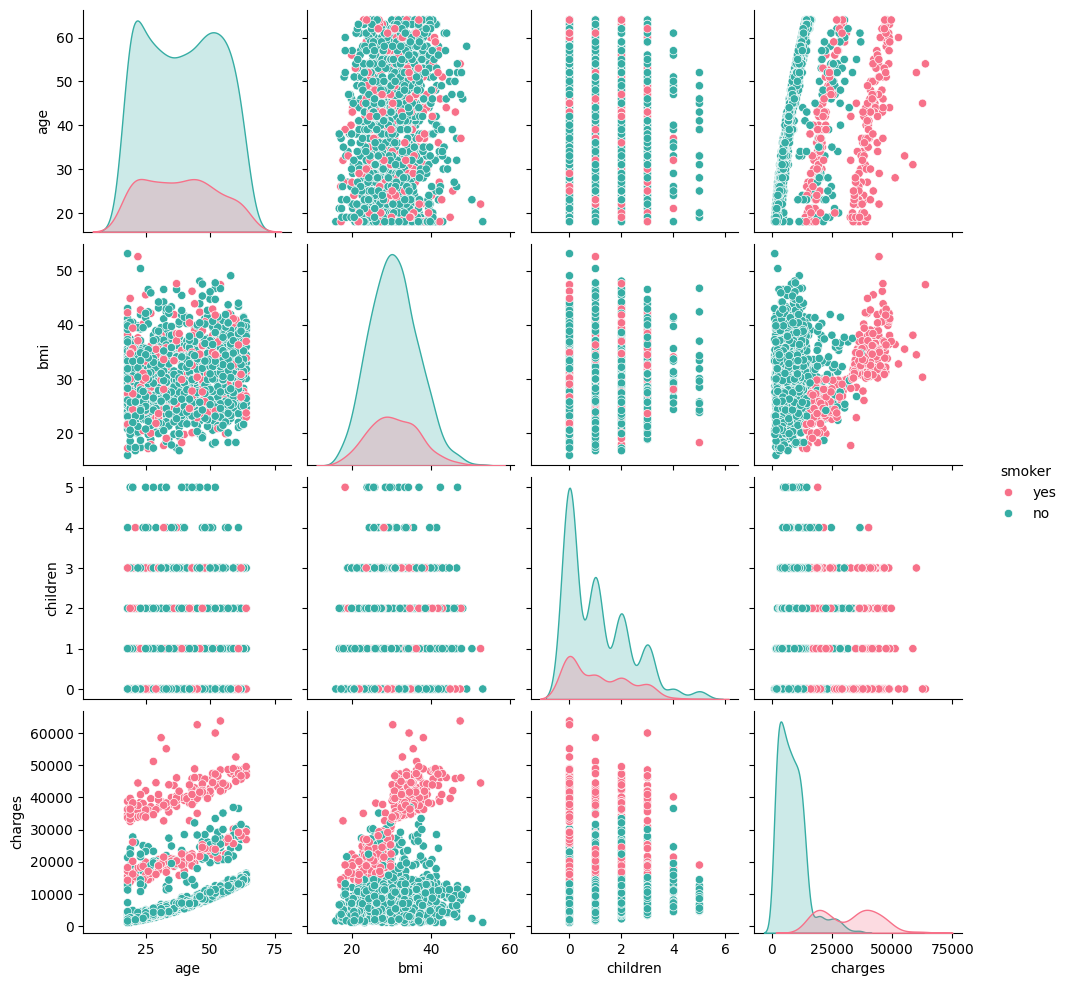

In [ ]:
# Pairplot of numerical features
sns.pairplot(df, hue='smoker', palette='husl')
plt.show()


In [ ]:
median_charges = df['charges'].median()
print(median_charges)
df['churn_risk'] = (df['charges'] > median_charges).astype(int)

9382.033


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,churn_risk
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0



    ## Data Preprocessing & Feature Engineering
    
    - Convert categorical variables (`smoker`, `region`) into numerical values.  
    - Create BMI categories (`Underweight`, `Normal`, `Overweight`, `Obese`).  
    - Define `churn_risk` as 1 if medical charges are above the median, otherwise 0.  
    

In [ ]:

    # Encode 'smoker' (Yes = 1, No = 0)
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


    # One-Hot Encode 'region'
    df = pd.get_dummies(df, columns=['region',"sex"], drop_first=True)

    # Create BMI categories (Binning BMI values)
    df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

    # Encode BMI category (convert categorical to numerical)
    df['bmi_category'] = LabelEncoder().fit_transform(df['bmi_category'])



    # Drop 'charges' column (since it's now converted to churn risk)
    df.drop(columns=['charges'], inplace=True)

    print("Processed Data Sample:")
    display(df.head())


Processed Data Sample:


,age,bmi,children,smoker,churn_risk,region_northwest,region_southeast,region_southwest,sex_male,bmi_category
0,19,27.900,0,1,1,False,False,True,False,2
1,18,33.770,1,0,0,False,True,False,True,1
2,28,33.000,3,0,0,False,True,False,True,1
3,33,22.705,0,0,1,True,False,False,True,0
4,32,28.880,0,0,0,True,False,False,True,2


## Train-Test Split

In [ ]:

    # Define features and target variable
    X = df.drop(columns=['churn_risk'])
    y = df['churn_risk']

    # Split into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'Training set size: {X_train.shape}')
    print(f'Test set size: {X_test.shape}')



Training set size: (1070, 9)
Test set size: (268, 9)


## Model Training & Evaluation

In [ ]:

    # Define models to test
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier()
    }

    results = {}

    for name, model in models.items():
        print(f"Training {name}")
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on test data

        # Evaluate model performance
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Store results
        results[name] = {'Accuracy': accuracy, 'ROC-AUC': roc_auc}

        # Print detailed classification report
        print(f"{name} Performance:")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

    # Convert results into DataFrame for comparison
    results_df = pd.DataFrame(results).T

    print("Model Performance Comparison:")
    display(results_df)


Training Logistic Regression
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.88      0.93      0.90       122

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268

--------------------------------------------------
Training Random Forest
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       146
           1       0.95      0.90      0.92       122

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268

--------------------------------------------------
Training XGBoost
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.91      0.95      

,Accuracy,ROC-AUC
Logistic Regression,0.910448,0.911745
Random Forest,0.932836,0.930272
XGBoost,0.925373,0.922749
